<a href="https://colab.research.google.com/github/Nikiloshen/Test-task-for-Quantum/blob/main/Dataset_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firstly, we will create a dataset with labeled mountains.



**Extracting Mountain names from wikipedia "List of mountains by elevation"**

In [31]:
import requests
from bs4 import BeautifulSoup

# We will parse wiki to gather Mountain Names.

url = "https://en.wikipedia.org/wiki/List_of_mountains_by_elevation"  # Wikipedia URL for mountain names
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

mountains = []
# Extract mountain names from table rows (They will serve as the target entities)
for row in soup.select('table.wikitable tbody tr'):
    cells = row.find_all('td')
    if cells:
        mountain_name = cells[0].get_text(strip=True)  # Adjust based on actual column
        mountains.append(mountain_name)

print(mountains[:25])  # Display first 25 names to verify
len(mountains)

['Mount Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu', 'Cho Oyu', 'Dhaulagiri', 'Manaslu', 'Nanga Parbat', 'Annapurna', 'Gasherbrum I(Hidden peak; K5)', 'Broad Peak', 'Gasherbrum II(K4)', 'Shishapangma', 'Gasherbrum III', 'Gyachung Kang', 'Annapurna II', 'Gasherbrum IV(K3)', 'Himalchuli', 'Distaghil Sar', 'Ngadi Chuli', 'Nuptse', 'Khunyang Chhish', 'Masherbrum(K1)', 'Nanda Devi']


1620

**Creating the NER Dataset Structure**

It involves two main parts: **Sentence Generation** (collecting or creating sentences containing mountain names) and **Annotation** (labeling the mountain names within those sentences as specific entities)

Ideally, we want a large set of real sentences where mountains are mentioned.

After some exploratory analysis, I have found only one helpful page about mountains, and it's Wiki Page, so we mainly would use **Synthetic Sentences** in our dataset.

We will write some templates (with use of ChatGPT), which we will then fill with our Mountain Names

In [32]:
templates = [
     "Many hikers dream of climbing {}.",
    "{} is one of the most famous mountains in the world.",
    "The weather near {} can be unpredictable.",
    "In recent years, tourism around {} has increased significantly.",
    "{} attracts adventurers and nature enthusiasts.",
    "The beauty of {} is truly mesmerizing.",
    "Local guides offer tours to {}.",
    "The elevation of {} challenges even experienced climbers.",
    "Mountaineers often prepare for months before attempting to summit {}.",
    "Photographers love capturing the sunrise over {}.",
    "The majestic {} stands tall against the skyline.",
    "Adventurers often seek out the challenges posed by {}.",
    "Visiting {} is a bucket-list item for many travelers.",
    "The history of {} is fascinating and deeply rooted in local culture.",
    "Tourists flock to {} during the summer months.",
    "The trails leading to {} offer stunning views of the surrounding landscape.",
    "Many documentaries feature the stunning vistas from {}.",
    "Camping near {} provides a unique experience for nature lovers.",
    "Scientists study the unique geology of {}.",
    "The flora and fauna around {} are diverse and plentiful.",
    "Seismic activity in the region affects the stability of {}.",
    "Research expeditions are often conducted on the slopes of {}.",
    "Local legends often speak of mystical beings living on {}.",
    "Festivals celebrating the beauty of {} are held annually.",
    "The cultural significance of {} is reflected in local art and literature.",
    "Stories of climbers' triumphs and tragedies on {} are shared around campfires.",
    "Scaling the heights of {} requires expert skills and preparation.",
    "Many have attempted to conquer the peak of {}, but few succeed.",
    "The rugged terrain of {} poses challenges even for experienced climbers.",
    "Every year, thrill-seekers embark on expeditions to reach the summit of {}."
]

In [33]:
import random

# Generate synthetic sentences
synthetic_sentences = [
    template.format(random.choice(mountains))  # Choose a random mountain name for each template
    for template in templates
    for _ in range(1000)  # Generate 1000 sentences per template
]

# Print a sample of the generated sentences
print(synthetic_sentences[:100])  # Display the first 20 sentences

len(synthetic_sentences)

['Many hikers dream of climbing Burchula.', 'Many hikers dream of climbing Maroon Peak.', 'Many hikers dream of climbing Nez Perce Peak.', 'Many hikers dream of climbing Kodachadri.', 'Many hikers dream of climbing Bivouac Peak.', 'Many hikers dream of climbing Mount Caubvick.', 'Many hikers dream of climbing Shishapangma.', 'Many hikers dream of climbing Gibraltar.', 'Many hikers dream of climbing Zumsteinspitze(Monte Rosa).', 'Many hikers dream of climbing Mount Prophet.', 'Many hikers dream of climbing Mount Tate.', 'Many hikers dream of climbing Big Hatchet Peak.', 'Many hikers dream of climbing Noshaq.', 'Many hikers dream of climbing Ghamubar Zom.', 'Many hikers dream of climbing Delano Peak.', 'Many hikers dream of climbing Maglić.', 'Many hikers dream of climbing Wildstrubel.', 'Many hikers dream of climbing Mount Tongariro.', 'Many hikers dream of climbing Mount Wilbur.', 'Many hikers dream of climbing Schilthorn.', 'Many hikers dream of climbing Ubinas.', 'Many hikers dream o

30000

Now lets append to these synthetic sentences some sentences with mountain names from wiki page

In [34]:
import requests
from bs4 import BeautifulSoup
import re

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/Mountain"

# Send a GET request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract text from paragraphs
paragraphs = soup.find_all('p')
text_content = ' '.join([para.get_text() for para in paragraphs])

# Print the first 500 characters of the extracted text to see what we have
print(text_content[:500])


 A mountain is an elevated portion of the Earth's crust, generally with steep sides that show significant exposed bedrock. Although definitions vary, a mountain may differ from a plateau in having a limited summit area, and is usually higher than a hill, typically rising at least 300 metres (980 ft) above the surrounding land. A few mountains are isolated summits, but most occur in mountain ranges.[1]
 Mountains are formed through tectonic forces, erosion, or volcanism,[1] which act on time sca


In [35]:
# Create a function to find sentences containing mountain names
def extract_sentences_with_mountains(text, mountain_names):
    # Split text into sentences
    sentences = re.split(r'(?<=[.!?]) +', text)
    mountain_sentences = []

    for sentence in sentences:
        for mountain in mountain_names:
            if mountain in sentence:
                mountain_sentences.append(sentence.strip())
                break  # Break to avoid adding the same sentence multiple times

    return mountain_sentences

# Extract sentences with mountain names
mountain_sentences = extract_sentences_with_mountains(text_content, mountains)
mountain_sentences[:10]

['Because of the less hospitable terrain and climate, mountains tend to be used less for agriculture and more for resource extraction, such as mining and logging, along with recreation, such as mountain climbing and skiing.\n The highest mountain on Earth is Mount Everest in the Himalayas of Asia, whose summit is 8,850\xa0m (29,035\xa0ft) above mean sea level.',
 'The tallest mountain including submarine terrain is Mauna Kea in Hawaii from its underwater base at 9,330 m (30,610 ft) and some scientists consider it to be the tallest on earth.[3]\n There is no universally accepted definition of a mountain.',
 'When the magma reaches the surface, it often builds a volcanic mountain, such as a shield volcano or a stratovolcano.[5]:\u200a194\u200a Examples of volcanoes include Mount Fuji in Japan and Mount Pinatubo in the Philippines.',
 'This is sometimes referred to as the "death zone".[47] The summits of Mount Everest and K2 are in the death zone.\n Mountains are generally less preferable

Let's clean this text

In [36]:
import re

# Sample list of sentences
text_data = [
   'Because of the less hospitable terrain and climate, mountains tend to be used less for agriculture and more for resource extraction, such as mining and logging, along with recreation, such as mountain climbing and skiing.\n The highest mountain on Earth is Mount Everest in the Himalayas of Asia, whose summit is 8,850\xa0m (29,035\xa0ft) above mean sea level.',
 'The tallest mountain including submarine terrain is Mauna Kea in Hawaii from its underwater base at 9,330 m (30,610 ft) and some scientists consider it to be the tallest on earth.[3]\n There is no universally accepted definition of a mountain.',
 'When the magma reaches the surface, it often builds a volcanic mountain, such as a shield volcano or a stratovolcano.[5]:\u200a194\u200a Examples of volcanoes include Mount Fuji in Japan and Mount Pinatubo in the Philippines.',
 'This is sometimes referred to as the "death zone".[47] The summits of Mount Everest and K2 are in the death zone.\n Mountains are generally less preferable for human habitation than lowlands, because of harsh weather and little level ground suitable for agriculture.',
 'There are for example a number of sacred mountains within Greece such as Mount Olympus which was held to be the home of the gods.[68] In Japanese culture, the 3,776.24\xa0m (12,389.2\xa0ft) volcano of Mount Fuji is also held to be sacred with tens of thousands of Japanese ascending it each year.[69] Mount Kailash, in the Tibet Autonomous Region of China, is considered to be sacred in four religions: Hinduism, Bon, Buddhism, and Jainism.',
 'In Ireland, pilgrimages are made up the 952 metres (3,123\xa0ft) Mount Brandon by Irish Catholics.[70] The Himalayan peak of Nanda Devi is associated with the Hindu goddesses Nanda and Sunanda;[71] it has been off-limits to climbers since 1983.',
 "Mount Ararat is a sacred mountain, as it is believed to be the landing place of Noah's Ark.",
 'Using this metric, Mount Everest is the highest mountain on Earth, at 8,848 metres (29,029\xa0ft).[73] There are at least 100 mountains with heights of over 7,200 metres (23,622\xa0ft) above sea level, all of which are located in central and southern Asia.',
 'There is no precise definition of surrounding base, but Denali,[74] Mount Kilimanjaro and Nanga Parbat are possible candidates for the tallest mountain on land by this measure.',
 "The bases of mountain islands are below sea level, and given this consideration Mauna Kea (4,207\xa0m (13,802\xa0ft) above sea level) is the world's tallest mountain and volcano, rising about 10,203\xa0m (33,474\xa0ft) from the Pacific Ocean floor.[75]\n The highest mountains are not generally the most voluminous."
]

# Function to clean the text
def clean_text(sentences):
    cleaned_sentences = []
    for sentence in sentences:
        # Remove non-breaking spaces and replace with regular spaces
        sentence = sentence.replace('\xa0', ' ')
        # Remove newlines and strip whitespace
        sentence = sentence.replace('\n', ' ').strip()
        # Remove citation references (e.g., [3], [5], etc.)
        sentence = re.sub(r'\[\d+\]', '', sentence)
        # Remove extra whitespace
        sentence = re.sub(r'\s+', ' ', sentence)
        # Add cleaned sentence to the list
        cleaned_sentences.append(sentence)

    return cleaned_sentences

# Clean the text data
cleaned_text_data = clean_text(text_data)

# Print the cleaned sentences
for i, sentence in enumerate(cleaned_text_data):
    print(f"{i+1}: {sentence}\n")

1: Because of the less hospitable terrain and climate, mountains tend to be used less for agriculture and more for resource extraction, such as mining and logging, along with recreation, such as mountain climbing and skiing. The highest mountain on Earth is Mount Everest in the Himalayas of Asia, whose summit is 8,850 m (29,035 ft) above mean sea level.

2: The tallest mountain including submarine terrain is Mauna Kea in Hawaii from its underwater base at 9,330 m (30,610 ft) and some scientists consider it to be the tallest on earth. There is no universally accepted definition of a mountain.

3: When the magma reaches the surface, it often builds a volcanic mountain, such as a shield volcano or a stratovolcano.: 194 Examples of volcanoes include Mount Fuji in Japan and Mount Pinatubo in the Philippines.

4: This is sometimes referred to as the "death zone". The summits of Mount Everest and K2 are in the death zone. Mountains are generally less preferable for human habitation than lowla

In [37]:
# Combine the two lists
combined_sentences = synthetic_sentences + cleaned_text_data

# Shuffle the combined list
random.shuffle(combined_sentences)

We have gathered a lot of sentences with Mountain Names. But, now we have some troubles with our dataset. It only contains sentences with mountain names. It can significantly affect the results of our named entity recognition (NER) model in several ways. Dataset should be balanced. It should how sentences without mountain names as well.

That's why next step will be adding some sentences without mountain names. We can take these sentences from public datasets, append them to our dataset and then shuffle it.

We will use 'Wikipediaapi' for extracting 10k sentences from geographic texts (because mountains often appear in geographic texts). With it, our dataset would contain 75% of sentences with mountain names (30k sentences) and 25% of sentences without mountain names (10k sentences)

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
!pip install wikipedia-api

import requests
import random
import nltk
from bs4 import BeautifulSoup

# Specify a custom User-Agent
headers = {
    'User-Agent': 'MyGeographyApp/1.0 (Contact: nikiloshen19888@gmail.com)'  # Replace with your email or a placeholder
}

# List of geographic topics to scrape sentences from
geographic_topics = [
    'Geography',
    'Earth',
    'Continents',
    'Countries',
    'Geographical_features',
    'Climate',
    'Rivers',
    'Oceans',
    'Deserts'
]

# Function to extract sentences from a given Wikipedia page
def extract_sentences_from_wikipedia(topic):
    url = f'https://en.wikipedia.org/wiki/{topic}'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')

        # Extract text from paragraphs and split into sentences
        sentences = []
        for paragraph in paragraphs:
            sentences.extend(nltk.sent_tokenize(paragraph.text))

        return sentences
    return []

# Collect sentences from all topics
geographic_sentences = []
for topic in geographic_topics:
    geographic_sentences.extend(extract_sentences_from_wikipedia(topic))

# Sample 10,000 random sentences (if available)
if len(geographic_sentences) > 10000:
    random_geographic_sentences = random.sample(geographic_sentences, 10000)
else:
    random_geographic_sentences = geographic_sentences  # Use all available sentences

# Display the first 5 random geographic sentences
for i, sentence in enumerate(random_geographic_sentences[:5]):
    print(f"{i+1}: {sentence}\n")

1: Geography (from Ancient Greek γεωγραφία geōgraphía; combining gê 'Earth' and gráphō 'write') is the study of the lands, features, inhabitants, and phenomena of Earth.

2: [1] Geography is an all-encompassing discipline that seeks an understanding of Earth and its human and natural complexities—not merely where objects are, but also how they have changed and come to be.

3: While geography is specific to Earth, many concepts can be applied more broadly to other celestial bodies in the field of planetary science.

4: [2] Geography has been called "a bridge between natural science and social science disciplines.

5: "[3]



In [40]:
random_geographic_sentences = clean_text(random_geographic_sentences)

In [41]:
random_geographic_sentences[:20]

["Geography (from Ancient Greek γεωγραφία geōgraphía; combining gê 'Earth' and gráphō 'write') is the study of the lands, features, inhabitants, and phenomena of Earth.",
 ' Geography is an all-encompassing discipline that seeks an understanding of Earth and its human and natural complexities—not merely where objects are, but also how they have changed and come to be.',
 'While geography is specific to Earth, many concepts can be applied more broadly to other celestial bodies in the field of planetary science.',
 ' Geography has been called "a bridge between natural science and social science disciplines.',
 '"',
 'Origins of many of the concepts in geography can be traced to Greek Eratosthenes of Cyrene, who may have coined the term "geographia" (c. 276 BC – c. 195/194 BC).',
 ' The first recorded use of the word γεωγραφία was as the title of a book by Greek scholar Claudius Ptolemy (100 – 170 AD).',
 ' This work created the so-called "Ptolemaic tradition" of geography, which included

In [42]:
len(random_geographic_sentences)

2593

Okay, we have only got 2593 sentences from wiki "Geography" topic. We have to find more.

Let's get more sentences from **ag_news** dataset.

In [43]:
!pip install datasets

from datasets import load_dataset
import random
import nltk

# Download the punkt tokenizer for sentence tokenization
nltk.download('punkt')

# Load a small dataset (AG News) which has manageable size
dataset = load_dataset('ag_news', split='train')

# Filter to keep only sentences related to geography/nature
geography_related_sentences = []
for entry in dataset:
    sentences = nltk.sent_tokenize(entry['text'])
    for sentence in sentences:
        if any(keyword in sentence.lower() for keyword in ['mountain', 'river', 'ocean', 'lake', 'forest', 'nature', 'earth', 'climate', 'geography', 'terrain']):
            geography_related_sentences.append(sentence)

# Sample 7500 random sentences (if available)
if len(geography_related_sentences) > 7500:
    random_news_sentences = random.sample(geography_related_sentences, 7500)
else:
    random_news_sentences = geography_related_sentences  # Use all available sentences

# Display the first 5 random geography-related sentences
for i, sentence in enumerate(random_news_sentences[:5]):
    print(f"{i+1}: {sentence}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1: Mauritian textile firm cuts jobs One of the oldest textile operators on the Indian Ocean island of Mauritius last week shut seven factories and cut 900 jobs.

2: But nothing killed the purple loosestrife weed, which has become a regional plague, until officials at the Parker River National Wildlife Refuge set a European beetle loose on it.

3: NASA's Genesis Spacecraft Adjusts Course (AP) AP - NASA's Genesis spacecraft successfully adjusted its course this week as it heads back toward Earth with a sample of solar wind particles, the space agency said Wednesday.

4: Earth is Rare, New Study Suggests (SPACE.com) SPACE.com - Flip a coin.

5: Heads, Earth is a common sort of planet.



Let's clean data, just to be safe.

In [44]:
random_news_sentences = clean_text(random_news_sentences)

In [46]:
len(random_news_sentences)

3553

Still need more data.

Now we will use "Wikipedia" dataset but without the prerequisite of having nature-themed words.

In [49]:
from datasets import load_dataset
import random
import nltk

# Download the punkt tokenizer for sentence tokenization
nltk.download('punkt')

# Load a general English Wikipedia dataset
dataset = load_dataset("wikipedia", "20220301.en", split="train")

# Filter to keep only general sentences (excluding nature)
general_sentences = []
for entry in dataset:
    sentences = nltk.sent_tokenize(entry['text'])
    for sentence in sentences:
        # Add your own logic to filter out sentences
        # Ignore sentences containing 'mountain', 'river', etc.
        if not any(keyword in sentence.lower() for keyword in ['mountain', 'river', 'ocean', 'lake', 'forest']):
            general_sentences.append(sentence)

    # Stop if we reach 4000 sentences
    if len(general_sentences) >= 4000:
        break

# Sample 4000 random sentences if we have that many
if len(general_sentences) > 4000:
    random_general_sentences = random.sample(general_sentences, 4000)
else:
    random_general_sentences = general_sentences

# Display the first 5 random general sentences
for i, sentence in enumerate(random_general_sentences[:5]):
    print(f"{i+1}: {sentence}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


README.md:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

wikipedia.py:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train-00000-of-00041.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00001-of-00041.parquet:   0%|          | 0.00/705M [00:00<?, ?B/s]

train-00002-of-00041.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00003-of-00041.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00004-of-00041.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00005-of-00041.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00006-of-00041.parquet:   0%|          | 0.00/366M [00:00<?, ?B/s]

train-00007-of-00041.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

train-00008-of-00041.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

train-00009-of-00041.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

train-00010-of-00041.parquet:   0%|          | 0.00/267M [00:00<?, ?B/s]

train-00011-of-00041.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00012-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00013-of-00041.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00014-of-00041.parquet:   0%|          | 0.00/222M [00:00<?, ?B/s]

train-00015-of-00041.parquet:   0%|          | 0.00/236M [00:00<?, ?B/s]

train-00016-of-00041.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00017-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00018-of-00041.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00019-of-00041.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00020-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00021-of-00041.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00022-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00023-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00024-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00025-of-00041.parquet:   0%|          | 0.00/218M [00:00<?, ?B/s]

train-00026-of-00041.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

train-00027-of-00041.parquet:   0%|          | 0.00/206M [00:00<?, ?B/s]

train-00028-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00029-of-00041.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

train-00030-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00031-of-00041.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

train-00032-of-00041.parquet:   0%|          | 0.00/200M [00:00<?, ?B/s]

train-00033-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00034-of-00041.parquet:   0%|          | 0.00/201M [00:00<?, ?B/s]

train-00035-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00036-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00037-of-00041.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00038-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00039-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00040-of-00041.parquet:   0%|          | 0.00/185M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6458670 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/41 [00:00<?, ?it/s]

1: In Aristotle's terminology, "natural philosophy" is a branch of philosophy examining the phenomena of the natural world, and includes fields that would be regarded today as physics, biology and other natural sciences.

2: In 272 words, and three minutes, Lincoln asserted that the nation was born not in 1789, but in 1776, "conceived in Liberty, and dedicated to the proposition that all men are created equal".

3: On August 17, 1862, the Dakota uprising in Minnesota, supported by the Yankton Indians, killed hundreds of white settlers, forced 30,000 from their homes, and deeply alarmed the Lincoln administration.

4: References

External links

 Graeme Base's official website
 A Learning Time activity guide for Animalia created by The Little Big Book Club

Alphabet books
1986 children's books
Picture books by Graeme Base
Puzzle books
Australian children's books
Puffin Books books

5: Examples of terrestrial albedo effects

Illumination
Albedo is not directly dependent on illumination b

In [50]:
random_general_sentences = clean_text(random_general_sentences)

In [51]:
len(random_general_sentences)

4000

Ok, we are done. Now let's gather 4 lists of sentences into 1 and shuffle it.

In [52]:
dataset = combined_sentences + random_geographic_sentences + random_news_sentences + random_general_sentences

In [54]:
random.shuffle(dataset) # Shuffle dataset

In [56]:
print(dataset[:50])
print(len(dataset))

['Post-war era At the end of World War II, the anarchist movement was severely weakened.', "Stories of climbers' triumphs and tragedies on Mount Haramukh are shared around campfires.", 'Research expeditions are often conducted on the slopes of Mount Prophet.', 'Accepting his fate, Hector begs Achilles not to spare his life, but to treat his body with respect after killing him.', 'Research expeditions are often conducted on the slopes of Nevado Tres Cruces Central.', '', 'In recent years, tourism around Panchchuli has increased significantly.', 'One consequence is that people are more cooperative if it is more likely that individuals will interact again in the future.', 'Overall, contemporary anarchists are much less violent and militant than their ideological ancestors.', 'Every year, thrill-seekers embark on expeditions to reach the summit of Delphi.', 'N. Korea snubs N-test speculation SEOUL -- An explosion that shot a 2-mile-wide mushroom cloud into the sky was the planned demolitio

**All right. Let's summarize what we've done and do the analysis.**

Our dataset now contains 40156 sentences.

It consists of 30k synthetic sentences, 13 sentences from wiki page with mountain names, 2593 random sentences from internet with geography topics, 3553 random sentences from news articles with geography topics and 4000 random general sentences from wikipedia dataset. Let's do some **visualization**.

In [57]:
import pandas as pd

# Summarizing the data
data = {
    'Category': [
        'Synthetic Sentences',
        'Mountain Sentences',
        'Geographic Random Sentences',
        'News Articles Geographic Sentences',
        'General Wikipedia Sentences'
    ],
    'Count': [
        30000,  # Synthetic sentences
        13,      # Mountain sentences from Wikipedia
        2593,    # Random sentences with geography topics
        3553,    # Random news articles with geography topics
        4000     # General sentences from Wikipedia
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

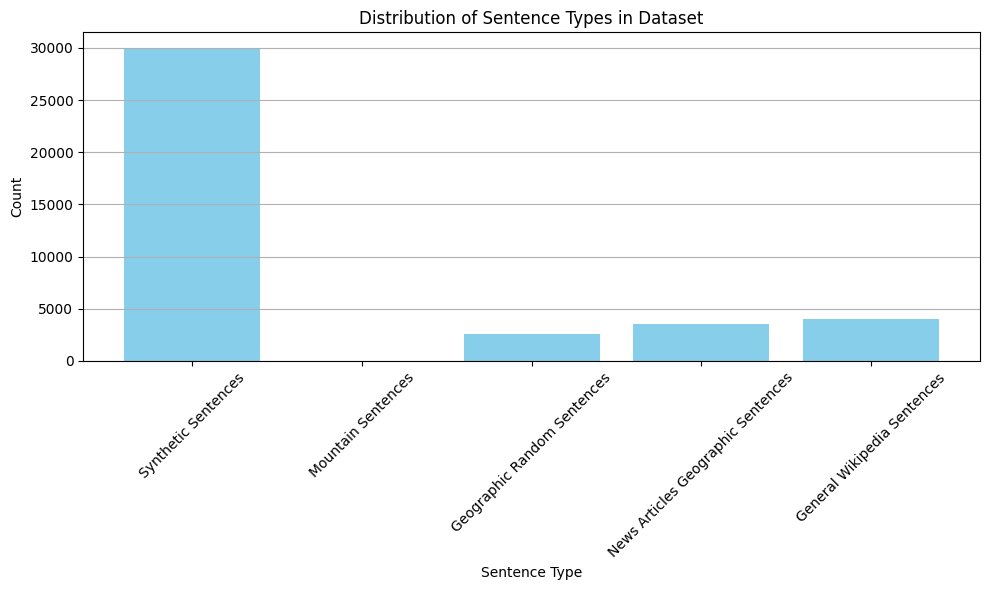

In [58]:
import matplotlib.pyplot as plt

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Count'], color='skyblue')
plt.title('Distribution of Sentence Types in Dataset')
plt.xlabel('Sentence Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

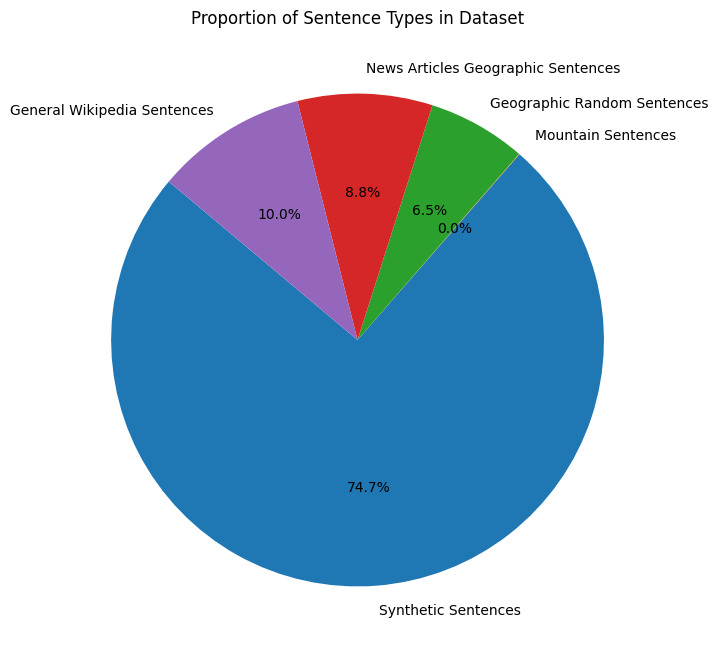

In [59]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sentence Types in Dataset')

# Show the plot
plt.show()

Now that we have the sentences, annotate each one to mark the mountain names as entities. This prepares the data for training our NER model.

In [61]:
def annotate_sentence(sentence, mountain_names):
    entities = []
    for mountain in mountain_names:
        start = sentence.find(mountain)
        if start != -1:
            end = start + len(mountain)
            entities.append((start, end, "MOUNTAIN"))
    return (sentence, {"entities": entities})

# Annotate all sentences
annotated_dataset = [annotate_sentence(sentence, mountains) for sentence in dataset]

# Display a sample of the annotated data
for entry in annotated_dataset[:15]:
    print(entry[0])
    print(entry[1])
    print()

Post-war era At the end of World War II, the anarchist movement was severely weakened.
{'entities': []}

Stories of climbers' triumphs and tragedies on Mount Haramukh are shared around campfires.
{'entities': [(47, 61, 'MOUNTAIN')]}

Research expeditions are often conducted on the slopes of Mount Prophet.
{'entities': [(58, 71, 'MOUNTAIN')]}

Accepting his fate, Hector begs Achilles not to spare his life, but to treat his body with respect after killing him.
{'entities': []}

Research expeditions are often conducted on the slopes of Nevado Tres Cruces Central.
{'entities': [(58, 76, 'MOUNTAIN'), (58, 84, 'MOUNTAIN')]}


{'entities': []}

In recent years, tourism around Panchchuli has increased significantly.
{'entities': [(32, 42, 'MOUNTAIN')]}

One consequence is that people are more cooperative if it is more likely that individuals will interact again in the future.
{'entities': []}

Overall, contemporary anarchists are much less violent and militant than their ideological ancestors.

**We achieved an excellent result!**

Now let's save it in CSV format and we're done here.

In [62]:
import pandas as pd

# Prepare the data for DataFrame
data_for_csv = [{'sentence': entry[0], 'entities': entry[1]['entities']} for entry in annotated_dataset]

# Create a DataFrame
df = pd.DataFrame(data_for_csv)

# Specify the file path
csv_file_path = 'annotated_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"Annotated dataset saved as {csv_file_path}")

Annotated dataset saved as annotated_dataset.csv
